# Sanity Check Calibration Run

Sometimes a calibration run goes wonky. Take a closer look and determine what's up. 

In [1]:
import os
import glob as g
from collections import defaultdict
from donuts import Donuts
import matplotlib.pyplot as plt

In [2]:
def run_calibration_routine(data_dir, plot=False):
    """
    Voyager calibration routine with some debugging plots
    """
    os.chdir(data_dir)
    direction_store = defaultdict(list)
    scale_store = defaultdict(list)
    filenames = sorted(g.glob("*.FIT"))
    for i in range(1, len(filenames)):
        commanded_direc = filenames[i].split('_')[2]
        donuts_ref = Donuts(filenames[i-1], subtract_bkg=True)
        shift = donuts_ref.measure_shift(filenames[i])                             
        direction, magnitude = determine_shift_direction_and_magnitude(shift)                       
        direction_store[commanded_direc].append(direction)                                  
        scale_store[commanded_direc].append(round(magnitude, 2))   

        if plot:
            # make a plot of the projections
            fig, ax = plt.subplots(2, figsize=(7.5, 7.5))
            ax[0].plot(donuts_ref.reference_image.proj_x, 'r-', label='x_ref')
            ax[1].plot(donuts_ref.reference_image.proj_y, 'r-', label='y_ref')
            ax[0].plot(shift.proj_x, 'k-', label='x_comp')
            ax[1].plot(shift.proj_y, 'k-', label='y_comp')
            ax[0].set_xlabel("X axis")
            ax[0].set_ylabel("Total counts per column")
            ax[1].set_xlabel("Y axis")
            ax[1].set_ylabel("Total counts per row")
            ax[0].legend()
            ax[1].legend()
            ax[0].set_title(f"{filenames[i]} shift: {direction} {magnitude:.2f}") 
            fig.tight_layout()
            plt.show()
    
        # reset reference image for next loop
        donuts_ref = Donuts(filenames[i], subtract_bkg=True)  
    return direction_store, scale_store

def determine_shift_direction_and_magnitude(shift):
    """                                              
    Take a donuts shift object and work out          
    the direction of the shift and the distance      
                                                     
    Parameters                                       
    ----------                                       
    shift : Donuts.shift                             
        A shift object containing the offset between 
        two images from Donuts                       
                                                     
    Returns                                          
    -------                                          
    direction : string                               
        The direction of the offset                  
    magnitude : float                                
        The magnitude of the shift in pixels         
                                                     
    Raises                                           
    ------                                           
    None                                             
    """                                              
    sx = shift.x.value                               
    sy = shift.y.value                               
    if abs(sx) > abs(sy):                            
        if sx > 0:                                   
            direction = '-x'                         
        else:                                        
            direction = '+x'                         
        magnitude = abs(sx)                          
    else:                                            
        if sy > 0:                                   
            direction = '-y'                         
        else:                                        
            direction = '+y'                         
        magnitude = abs(sy)                          
    return direction, magnitude                      

In [3]:
data_dir_east = "/Users/jmcc/Downloads/2023-06-24_Pointing_East"
data_dir_west = "/Users/jmcc/Downloads/2023-06-24_Pointing_West"

### Inspect the East autoguiding projections and shifts to look for issues

/Users/jmcc/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/donuts/image.py:152: UserWarning: Removing y=31 pixels from image upper edge
  warnings.warn("Removing y={} pixels from image upper edge".format(trim_y))
/Users/jmcc/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


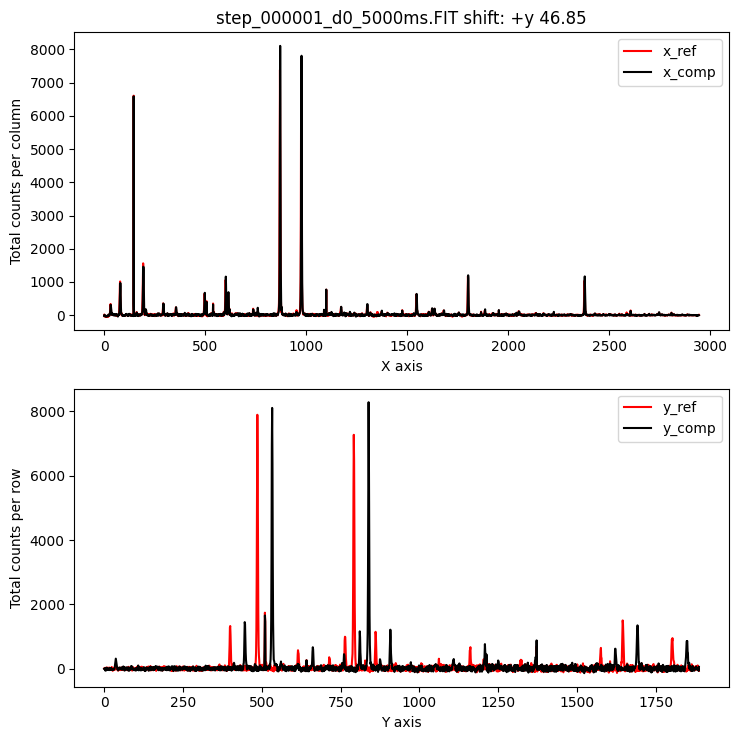

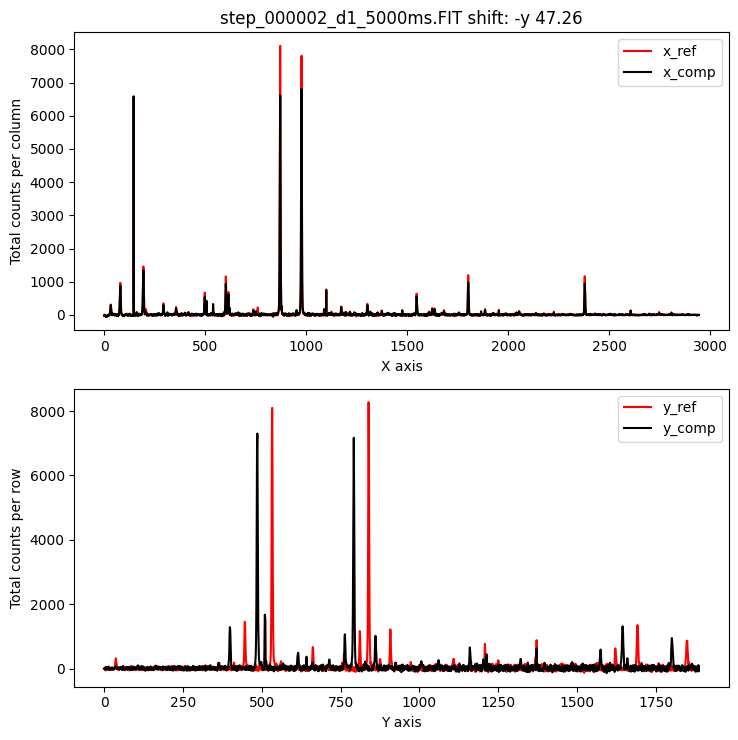

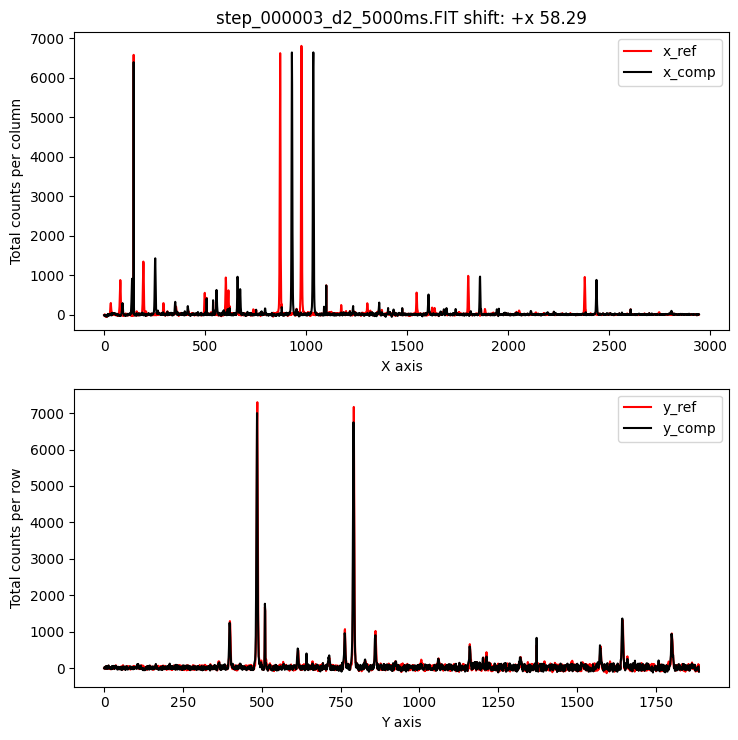

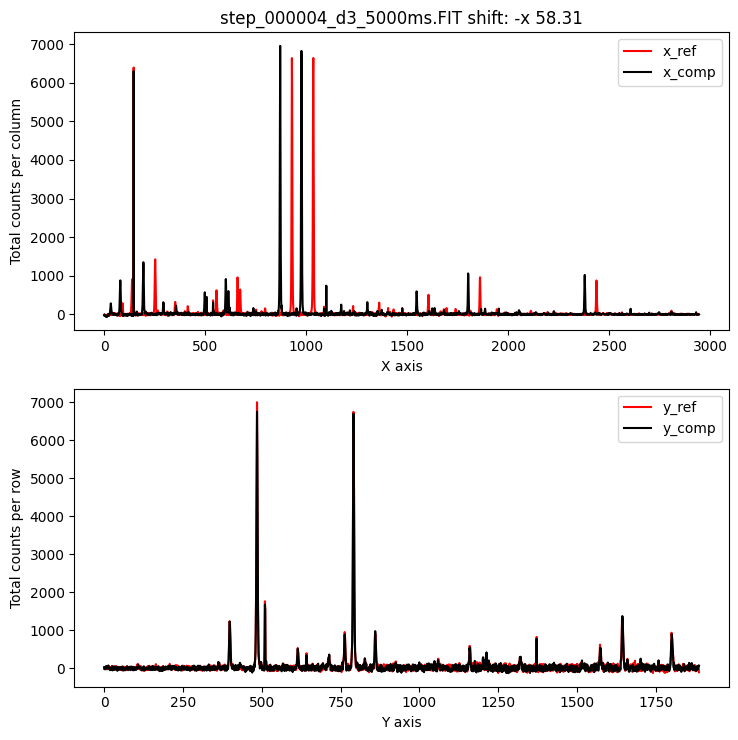

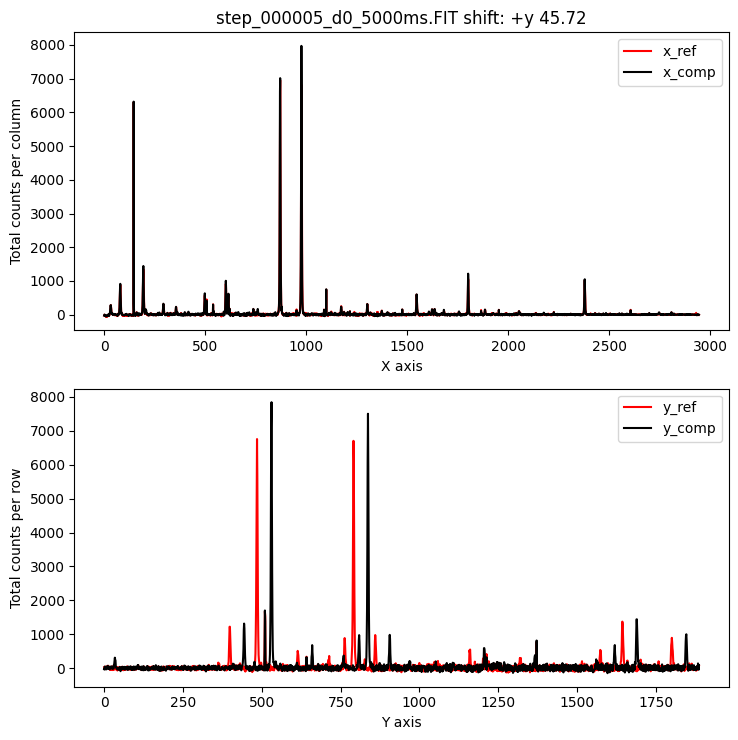

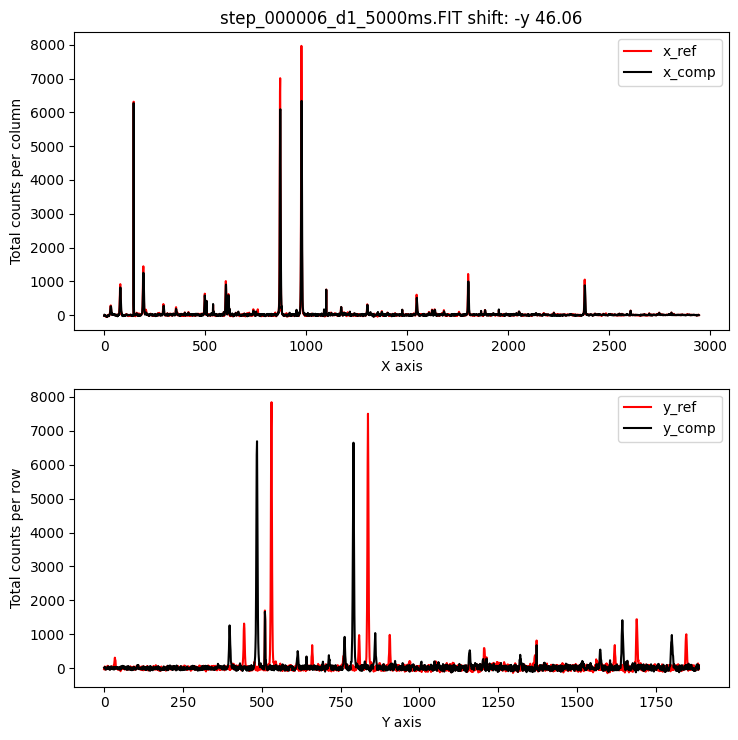

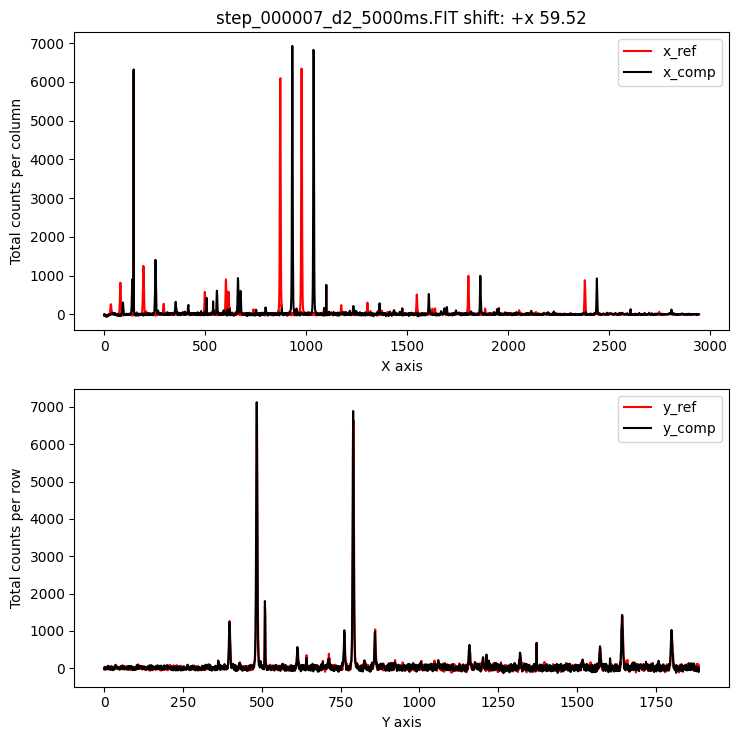

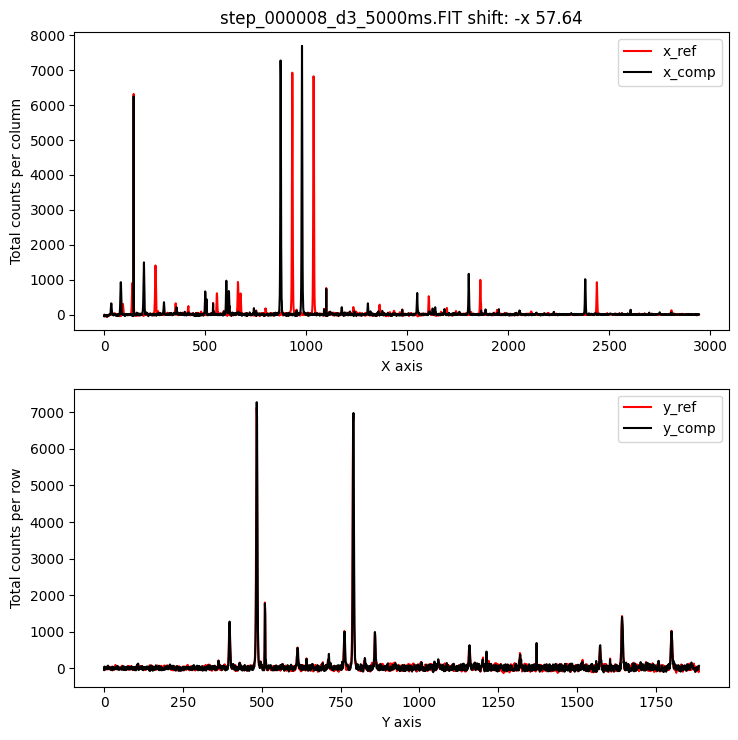

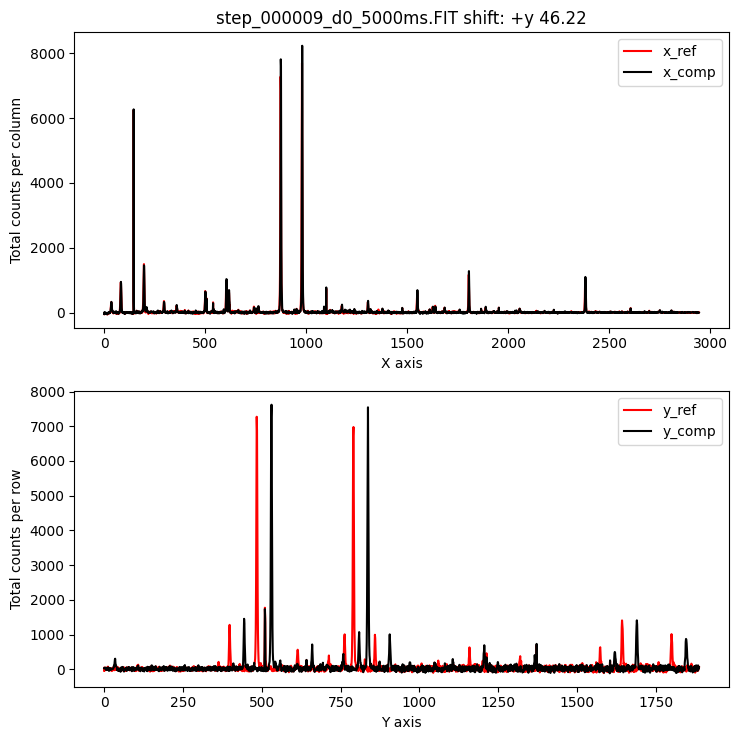

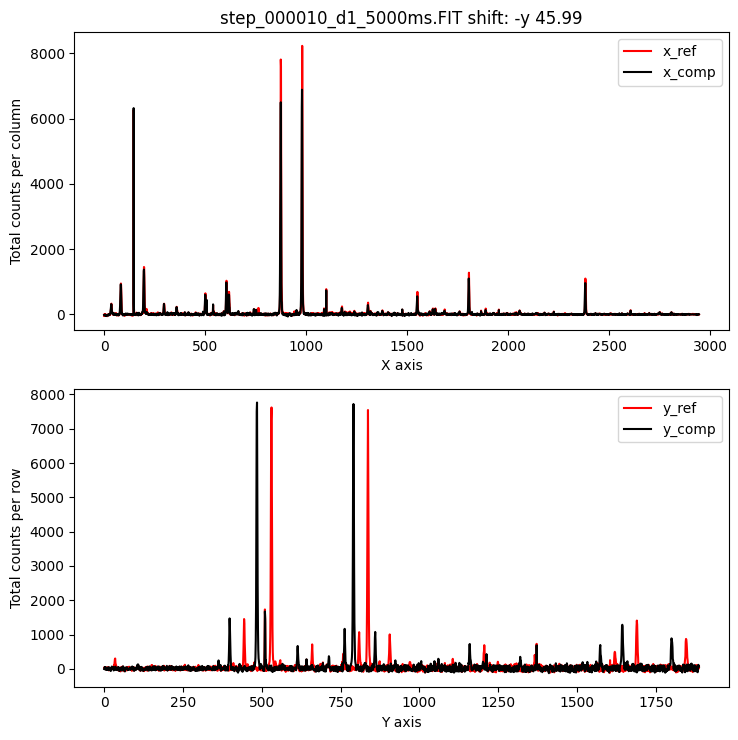

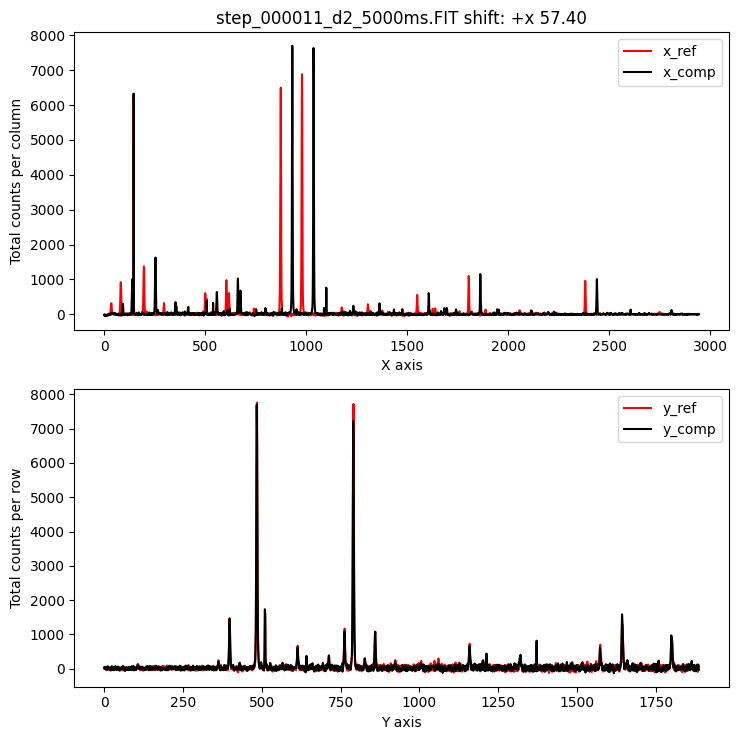

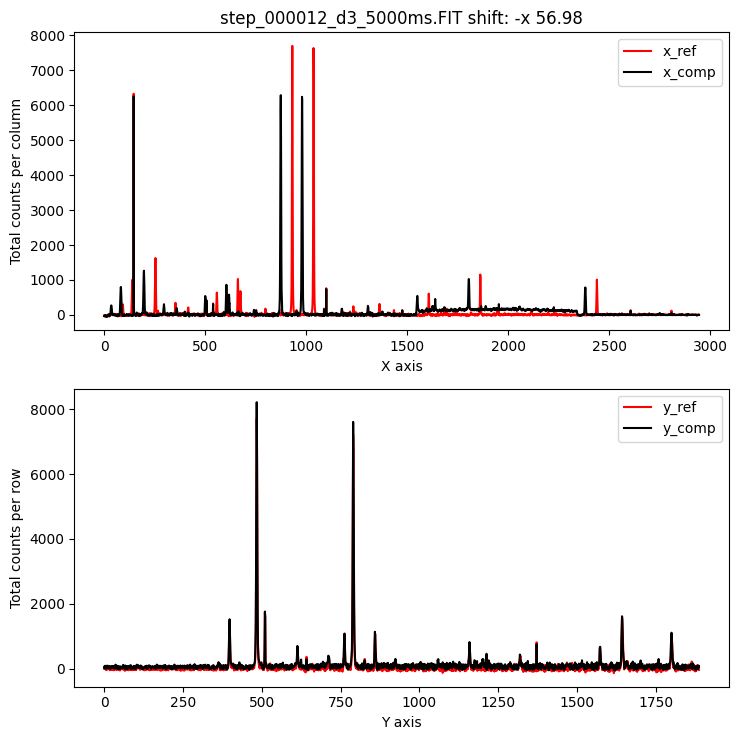

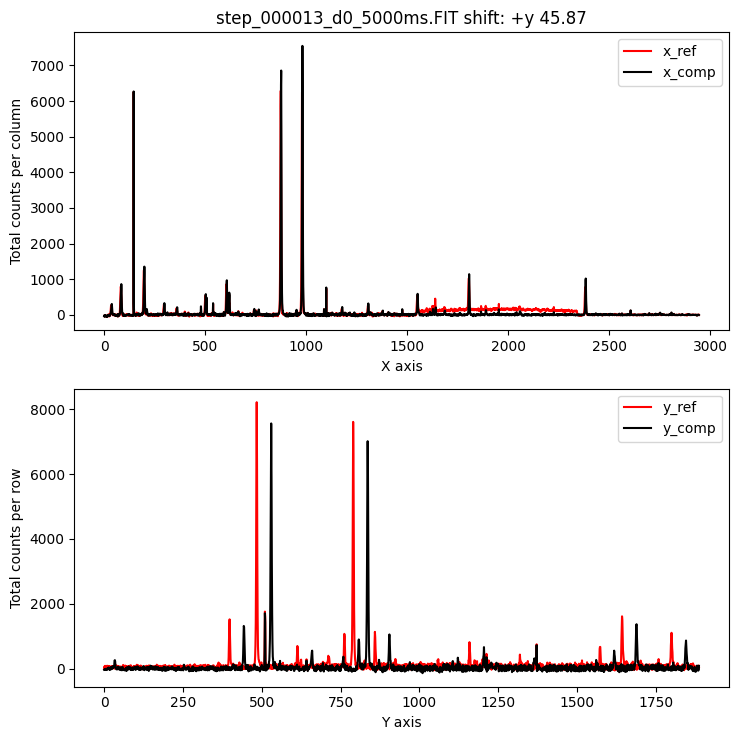

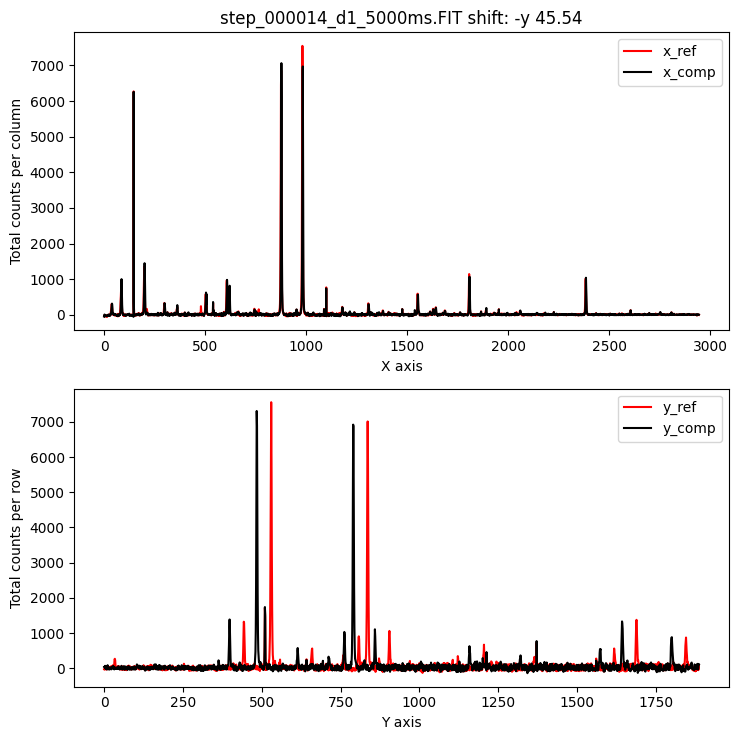

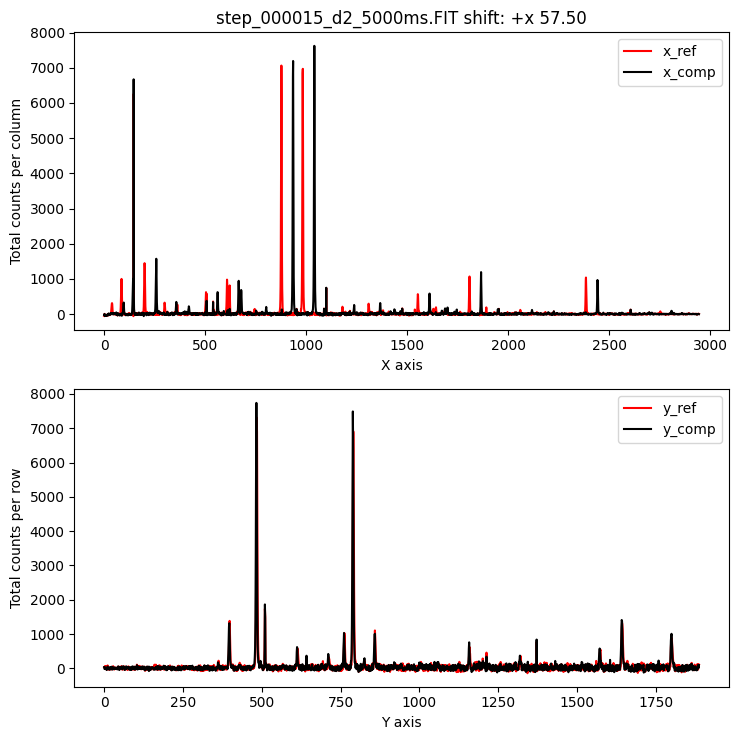

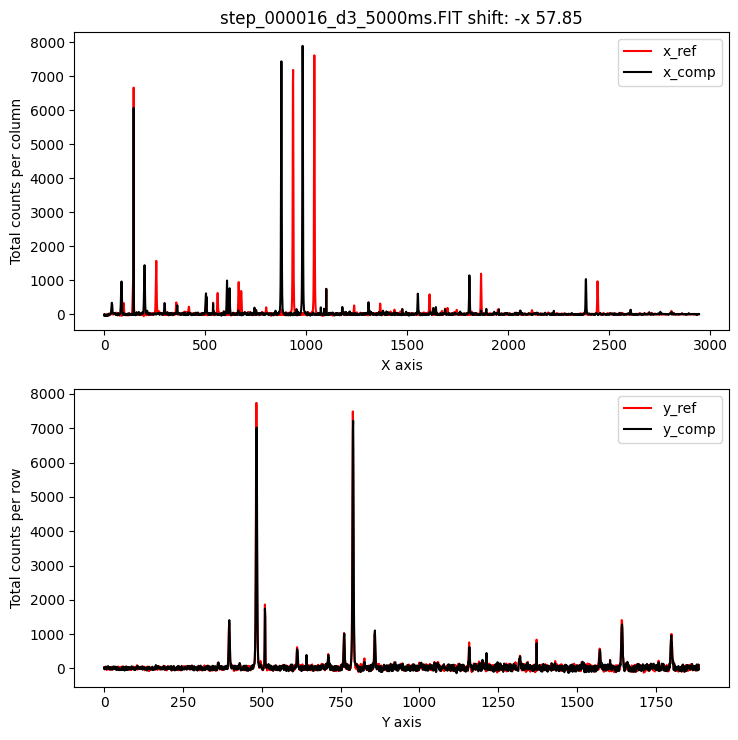

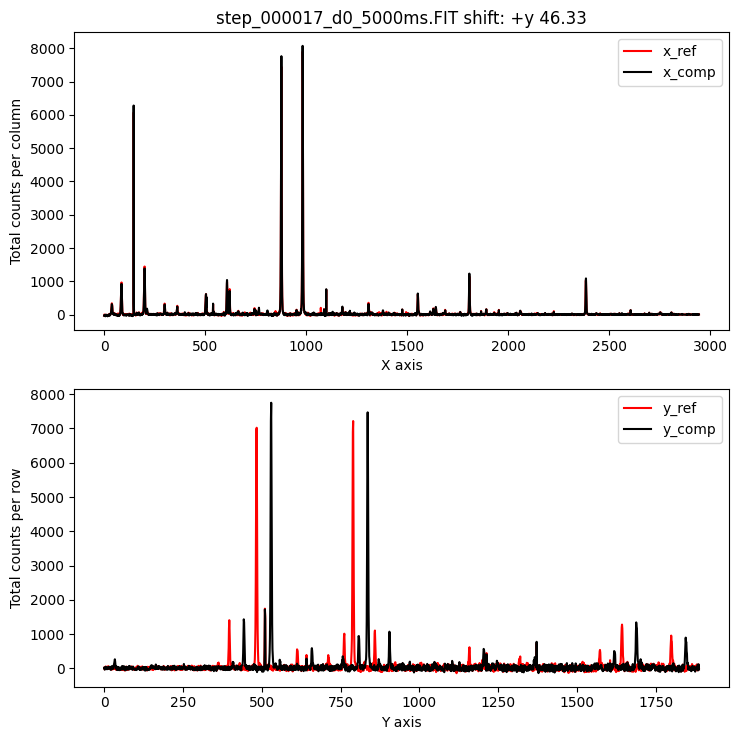

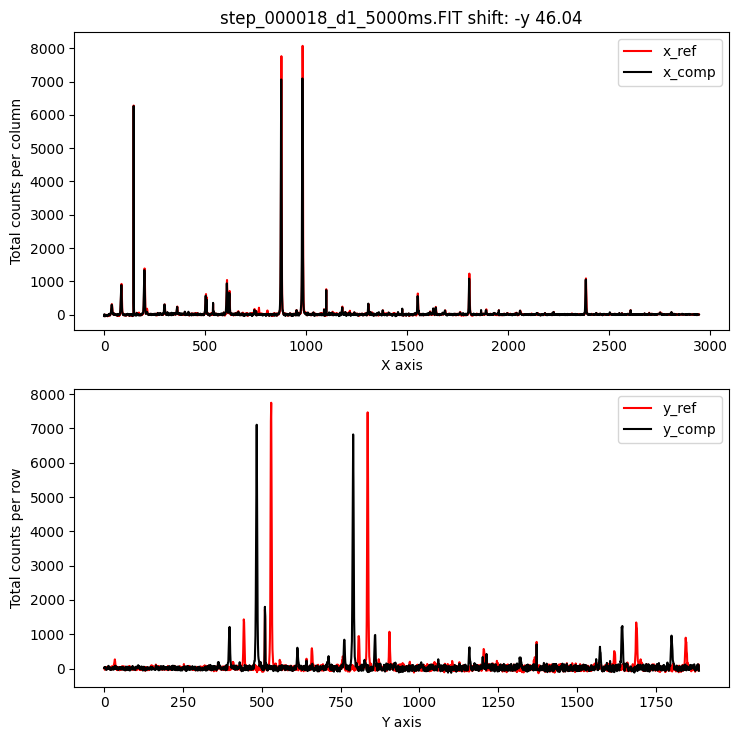

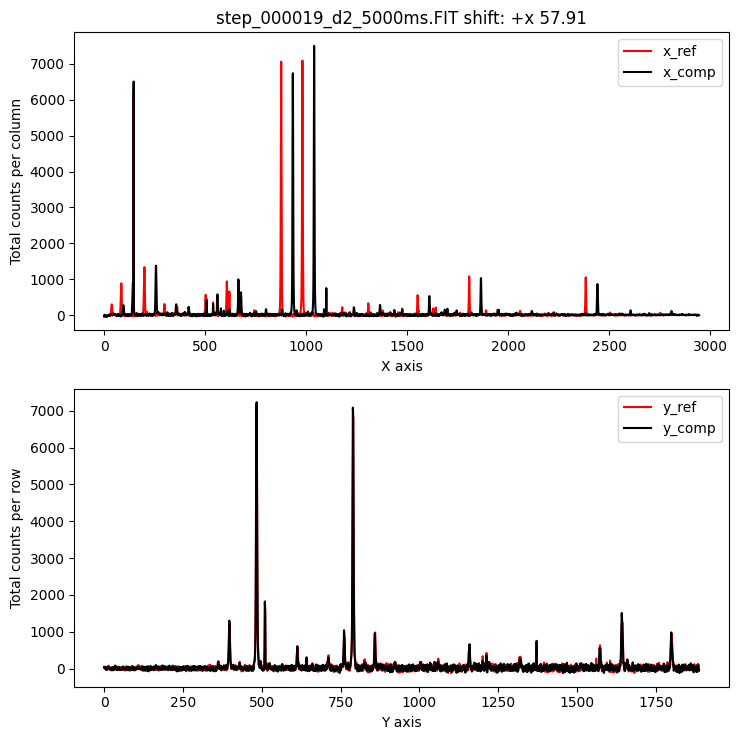

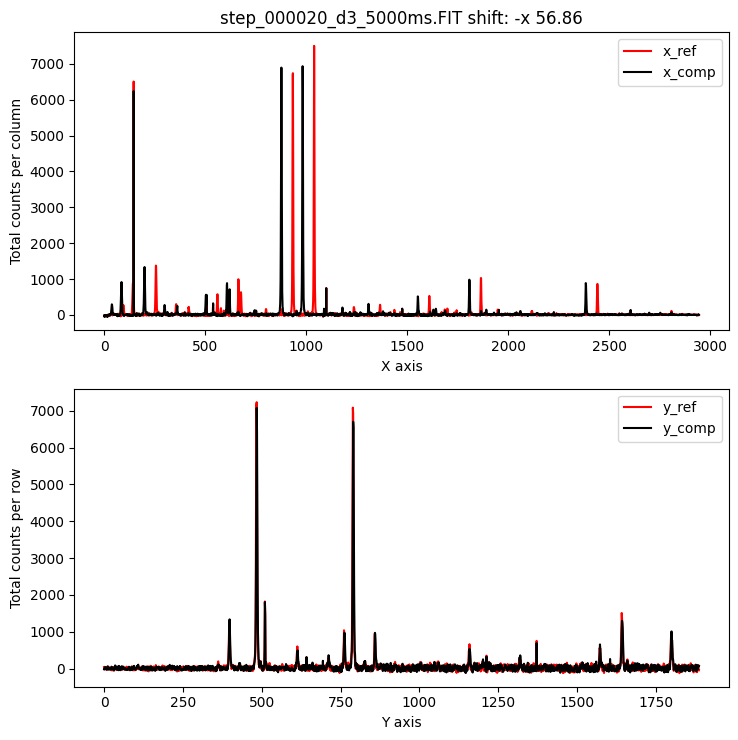

In [4]:
direc_east, scale_east = run_calibration_routine(data_dir_east, plot=True)

### Inspect the West autoguiding projections and shifts to look for issues

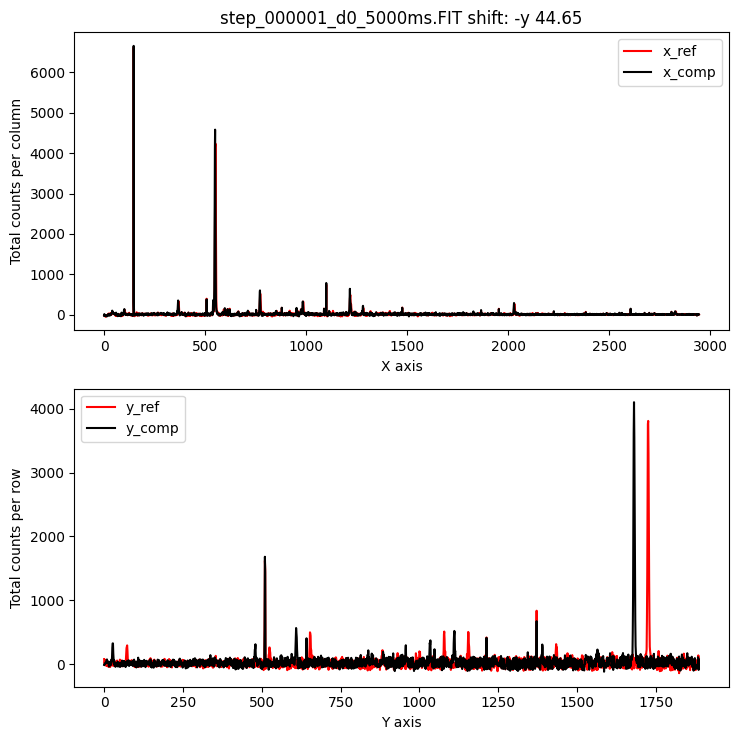

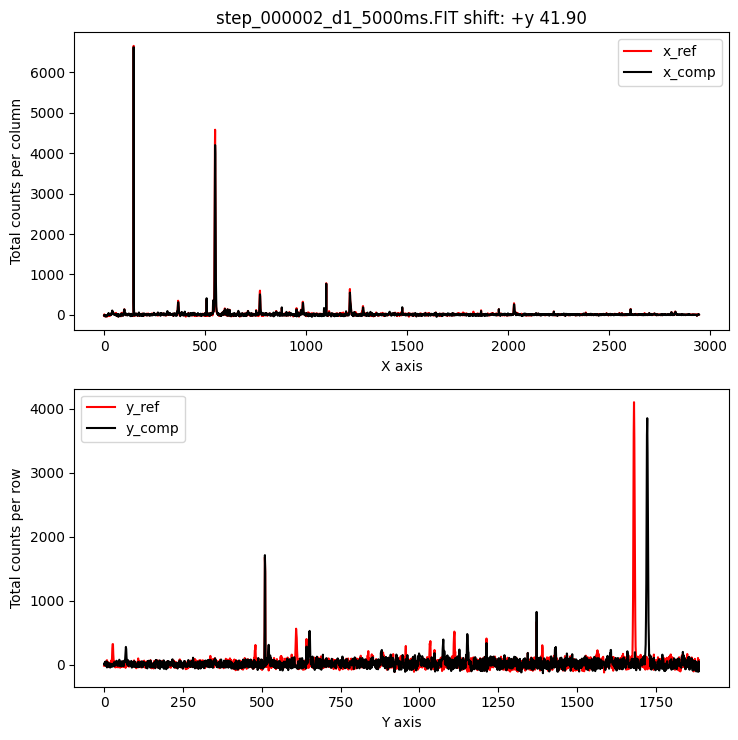

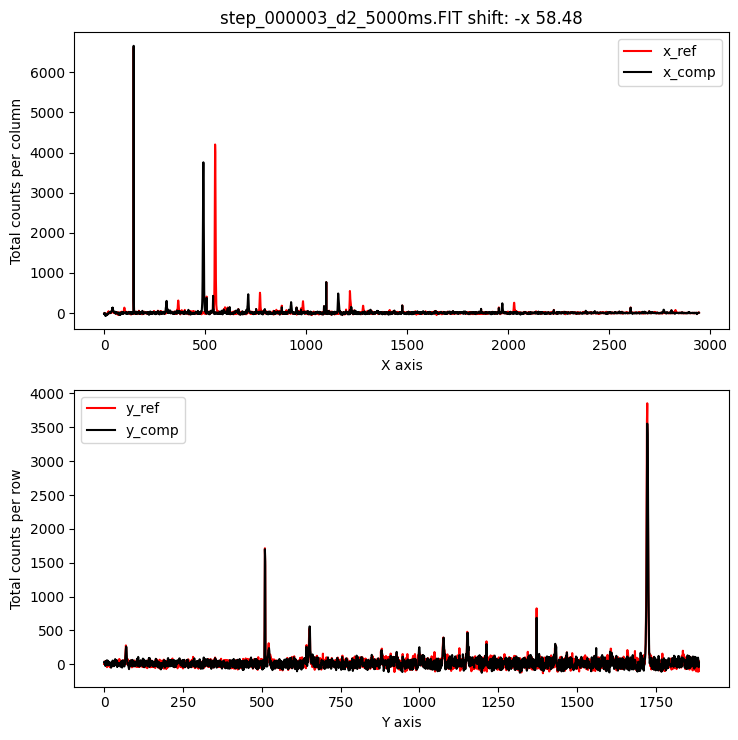

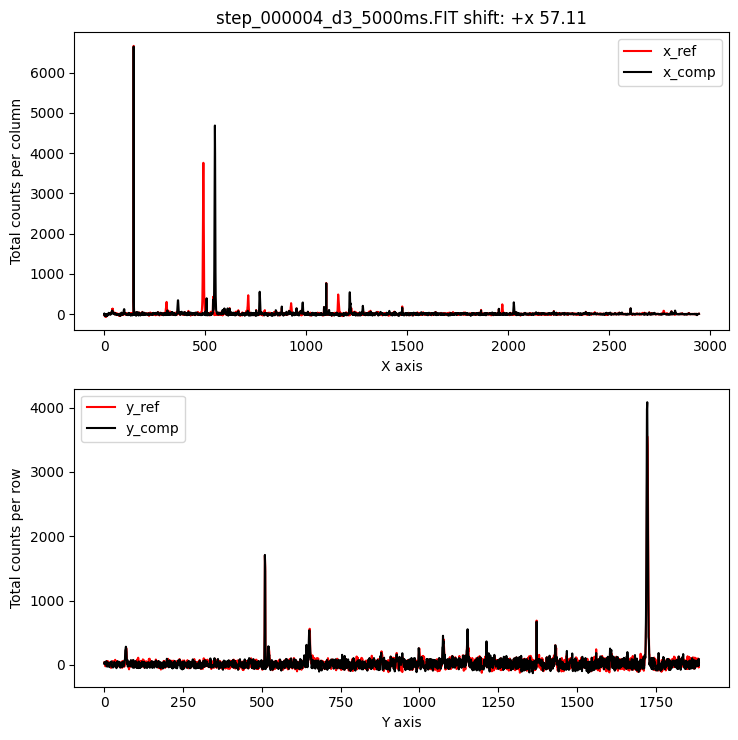

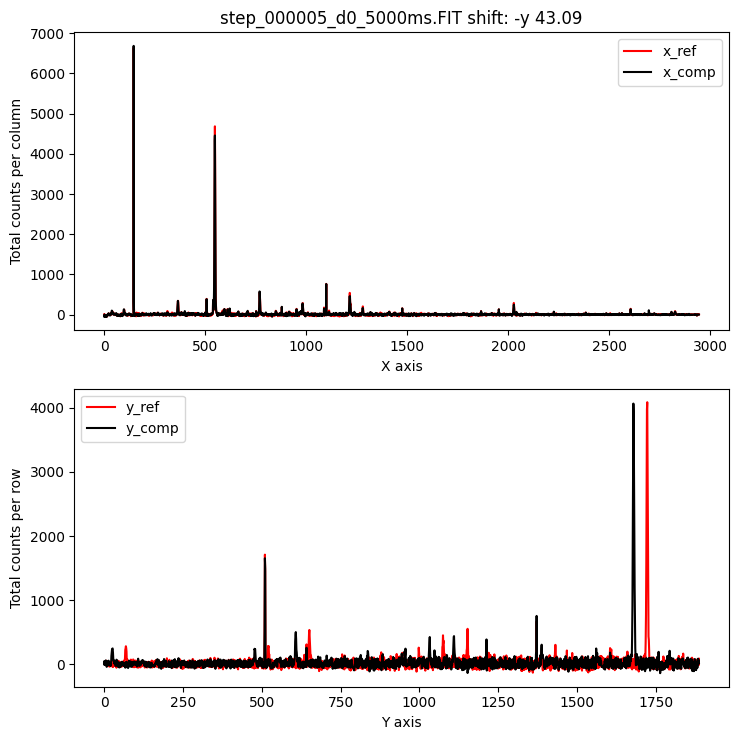

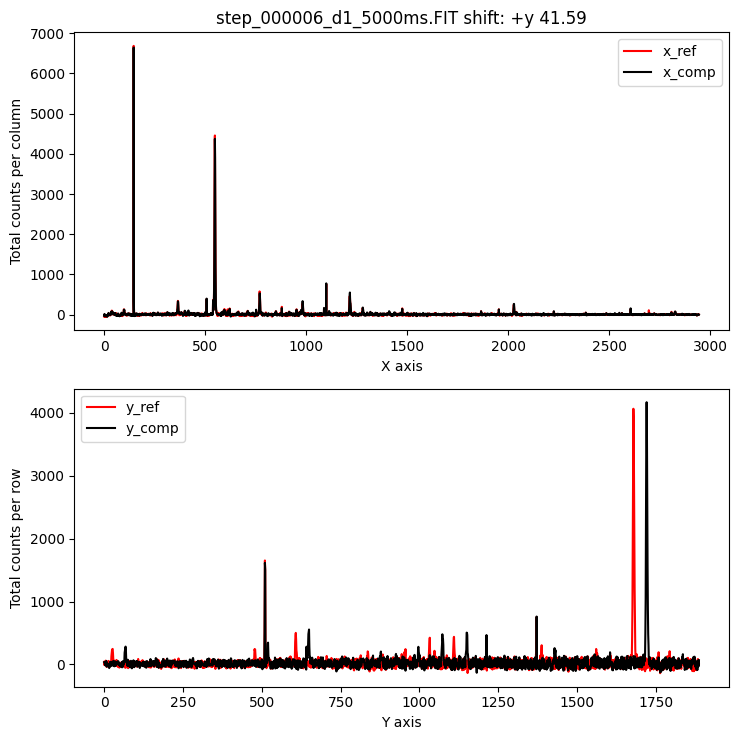

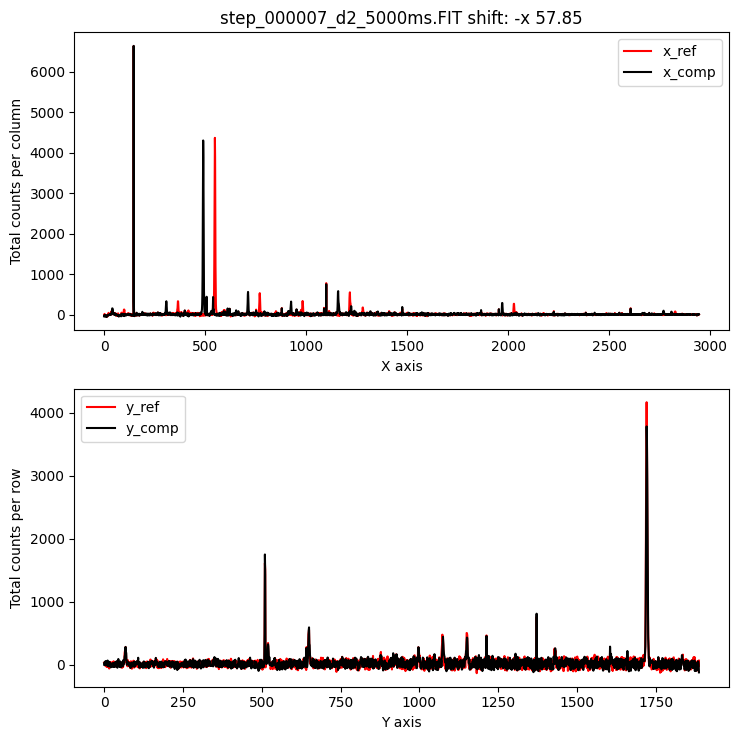

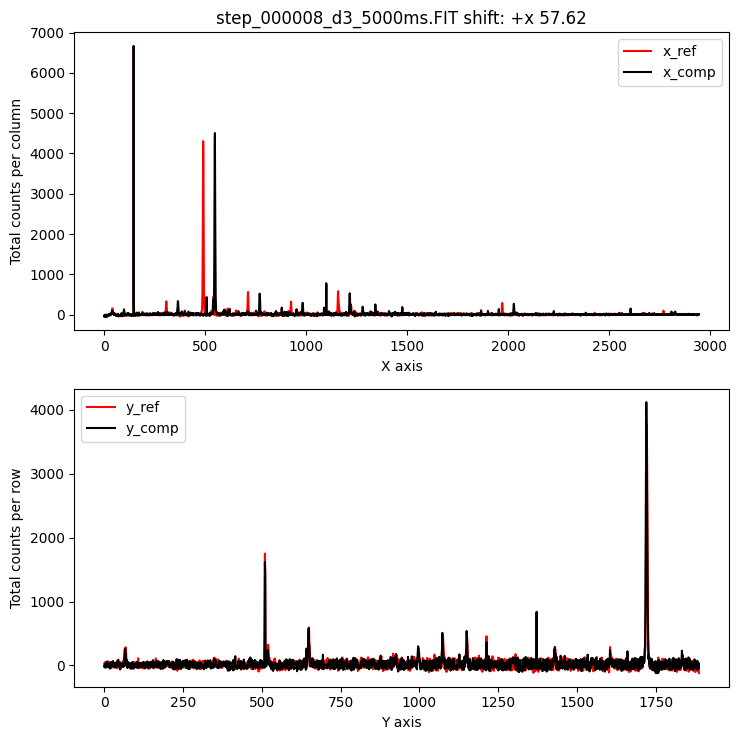

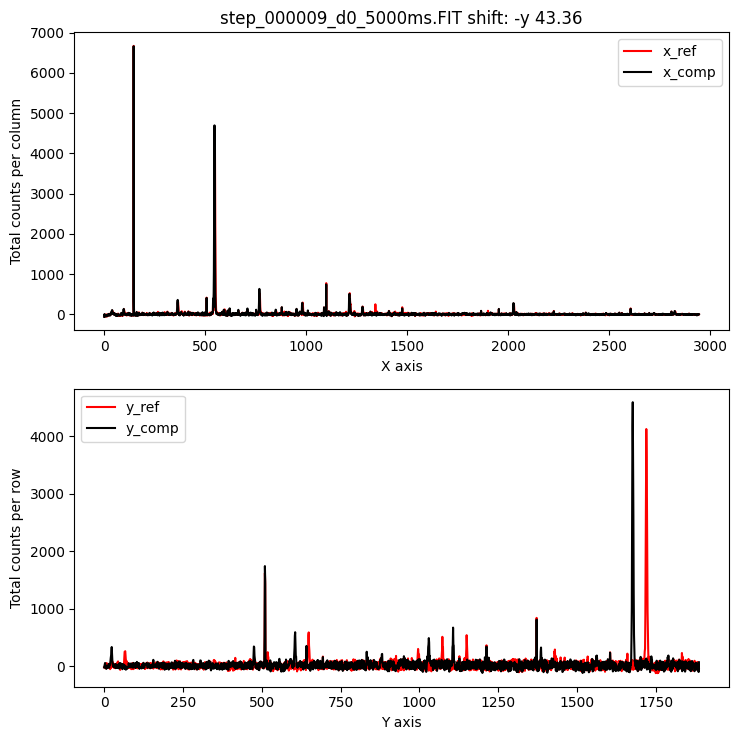

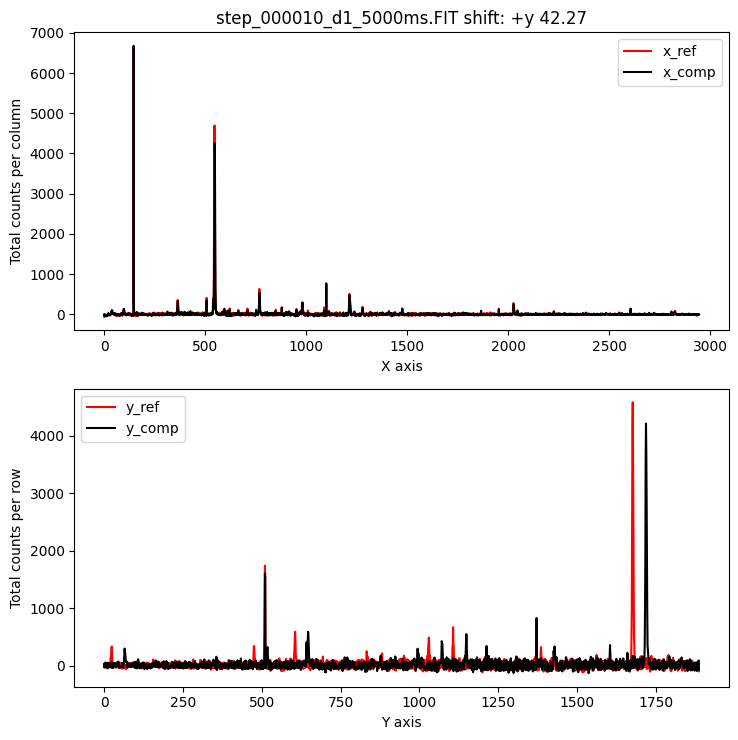

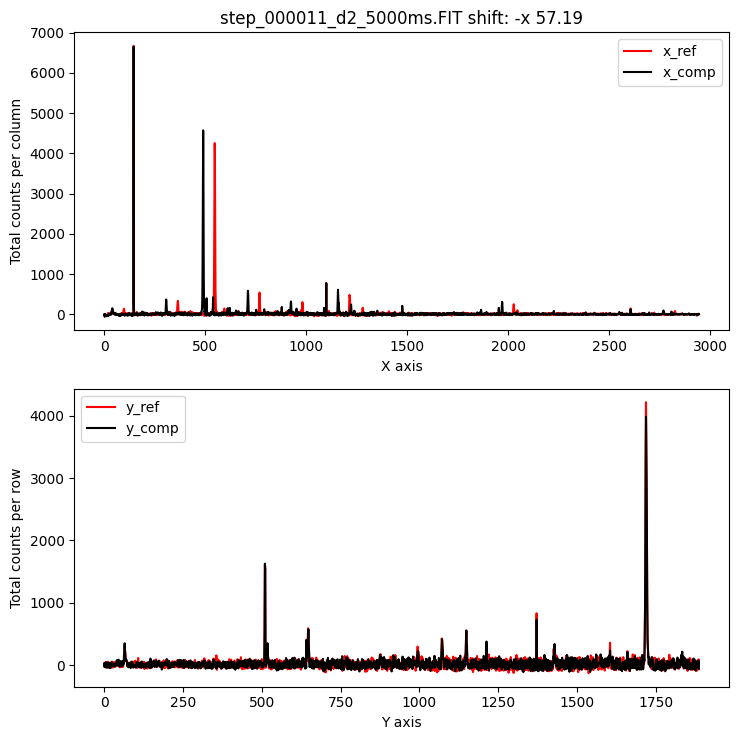

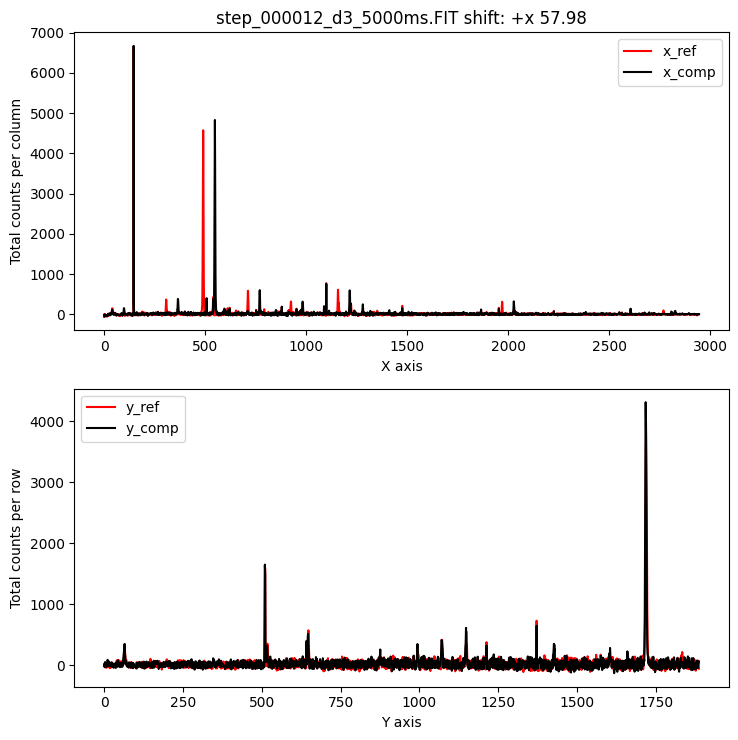

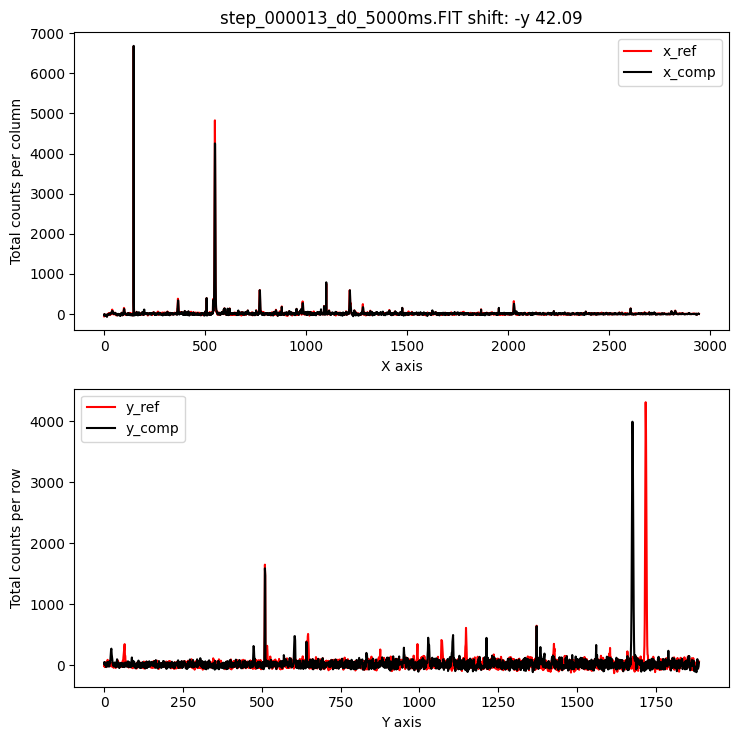

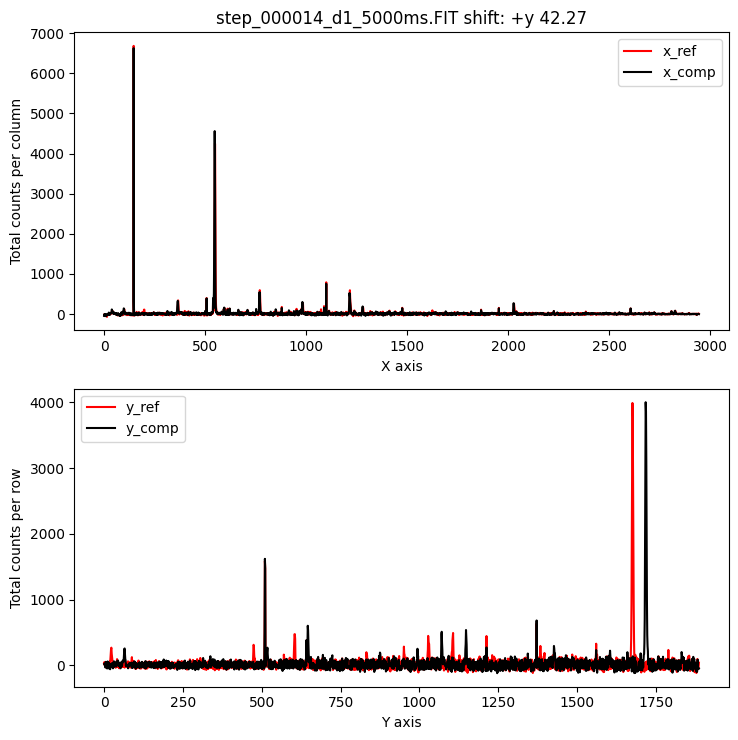

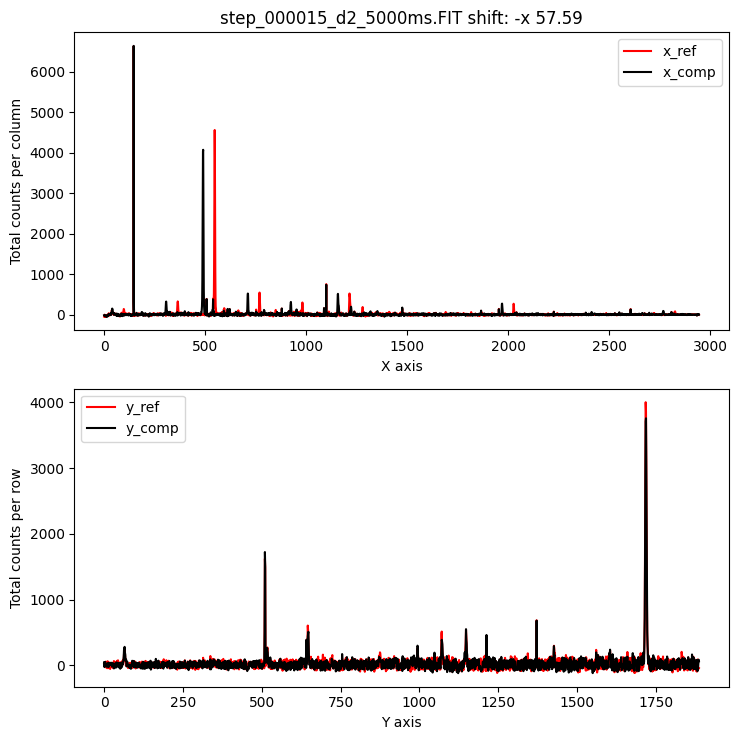

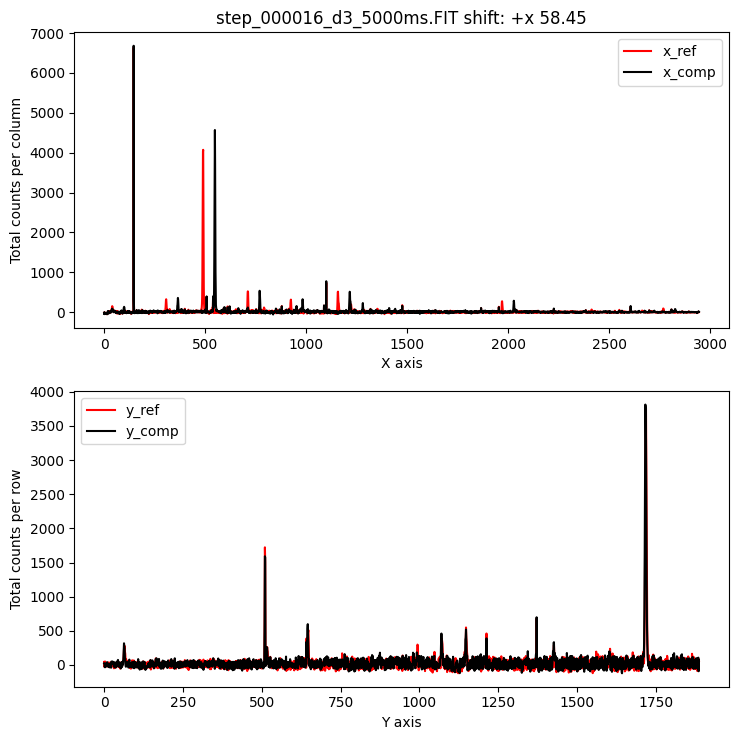

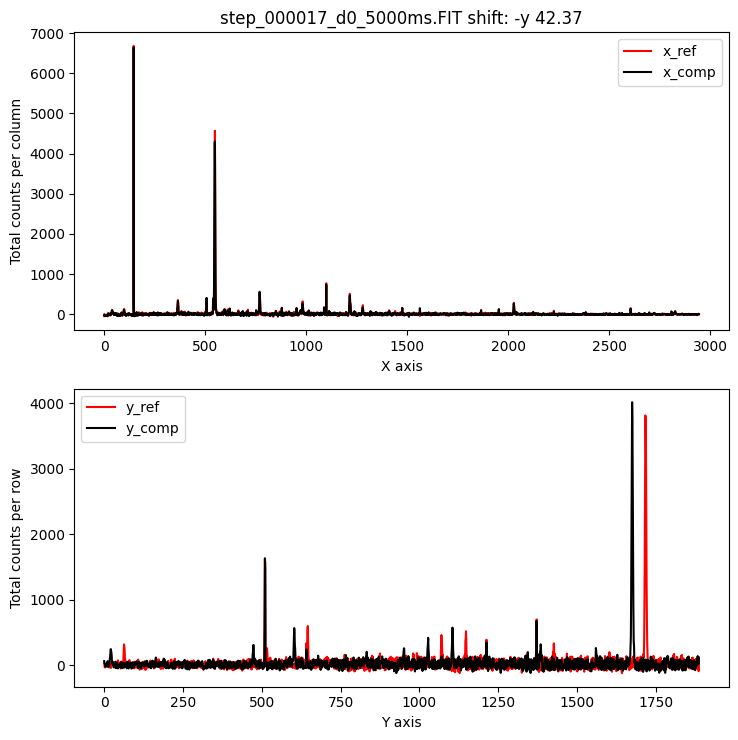

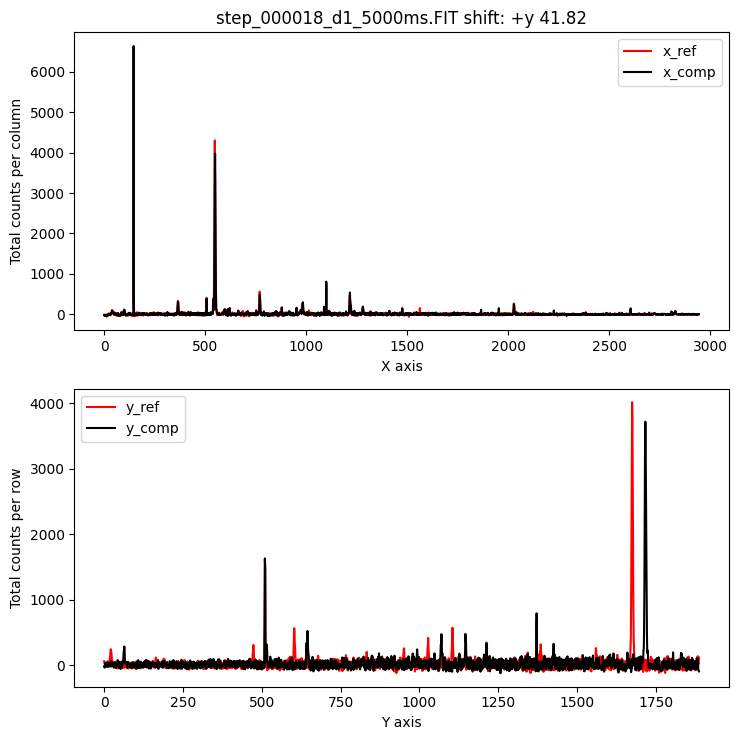

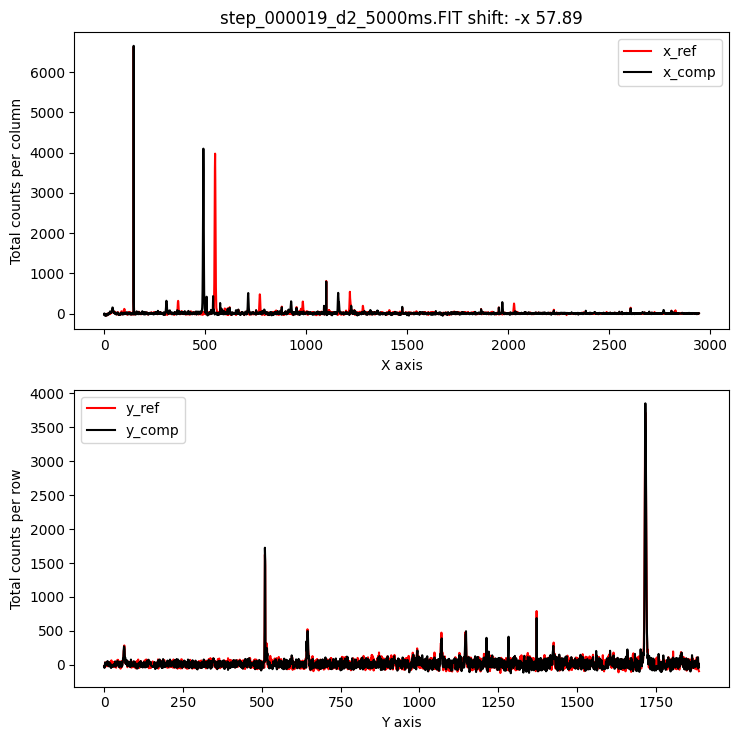

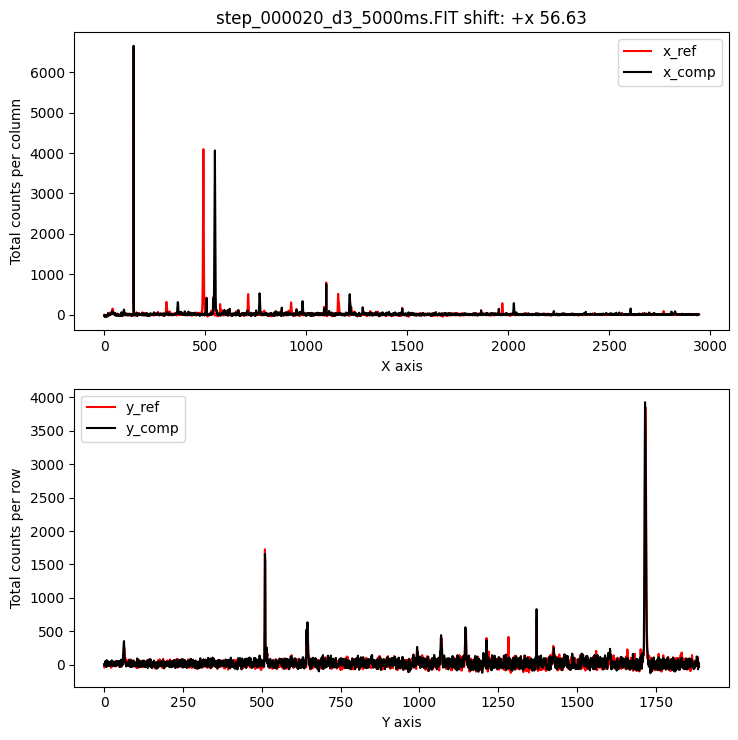

In [5]:
direc_west, scale_west = run_calibration_routine(data_dir_west, plot=True)

## Summary of calibration runs

In [6]:
print("EAST:")
for direc in direc_east:
    print(direc, direc_east[direc])
    print(direc, scale_east[direc])
print("WEST:")
for direc in direc_west:
    print(direc, direc_west[direc])
    print(direc, scale_west[direc])

EAST:
d0 ['+y', '+y', '+y', '+y', '+y']
d0 [46.85, 45.72, 46.22, 45.87, 46.33]
d1 ['-y', '-y', '-y', '-y', '-y']
d1 [47.26, 46.06, 45.99, 45.54, 46.04]
d2 ['+x', '+x', '+x', '+x', '+x']
d2 [58.29, 59.52, 57.4, 57.5, 57.91]
d3 ['-x', '-x', '-x', '-x', '-x']
d3 [58.31, 57.64, 56.98, 57.85, 56.86]
WEST:
d0 ['-y', '-y', '-y', '-y', '-y']
d0 [44.65, 43.09, 43.36, 42.09, 42.37]
d1 ['+y', '+y', '+y', '+y', '+y']
d1 [41.9, 41.59, 42.27, 42.27, 41.82]
d2 ['-x', '-x', '-x', '-x', '-x']
d2 [58.48, 57.85, 57.19, 57.59, 57.89]
d3 ['+x', '+x', '+x', '+x', '+x']
d3 [57.11, 57.62, 57.98, 58.45, 56.63]
